In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df_zara=pd.read_csv('Zara_Sales_Analysis_projeto.csv')

In [4]:
df_zara.head(2)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN


In [5]:
df_zara.describe()

,Product ID,Sales Volume,price
count,252.000000,252.000000,252.000000
mean,153370.503968,1823.702381,86.252540
std,26160.444549,697.703748,52.083205
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151681.500000,1839.500000,79.900000
75%,175669.750000,2398.750000,109.000000
max,199631.000000,2989.000000,439.000000


In [6]:
df_zara.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [7]:
df_zara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [12]:
colunas=['Product Position',
                     'Promotion',
                     'Product Category',
                     'Seasonal',
                     'brand',
                     'currency',
                     'section']

for col in colunas:
    df_zara[col]=df_zara[col].astype('category')

print(df_zara[colunas].dtypes)
                     

Product Position    category
Promotion           category
Product Category    category
Seasonal            category
brand               category
currency            category
section             category
dtype: object


In [14]:
df_zara.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,name,price,currency,terms,section,average ticket price
0,185102,Aisle,No,Clothing,No,2823,Zara,BASIC PUFFER JACKET,19.99,USD,jackets,MAN,141.220610
1,188771,Aisle,No,Clothing,No,654,Zara,TUXEDO JACKET,169.00,USD,jackets,MAN,3.869822
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,SLIM FIT SUIT JACKET,129.00,USD,jackets,MAN,17.209302
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,STRETCH SUIT JACKET,129.00,USD,jackets,MAN,12.155039
4,192936,End-cap,No,Clothing,Yes,2942,Zara,DOUBLE FACED JACKET,139.00,USD,jackets,MAN,21.165468


Pergunta 1 Com base nas colunas price e sales volume, a empresa precisa saber qual é o valor do seu ticket médio.
Crie uma coluna para as próximas análises.

In [15]:
df_zara['average ticket price']= df_zara['Sales Volume'] / df_zara['price']

Pergunta 2 (Sem Gráfico):
Qual é o preço médio dos produtos com e sem promoção?

Objetivo: Avaliar se produtos promocionais são realmente mais baratos.

In [16]:
preço_medio_promocao = df_zara.groupby('Promotion', observed=True)['price'].mean()

print(preço_medio_promocao)

Promotion
No     80.651515
Yes    92.413667
Name: price, dtype: float64


Pergunta 3 (Com Gráfico):
Distribuição do volume de vendas por preço (Histograma)

Objetivo: Entender como o volume de vendas se distribui em diferentes faixas de preço.

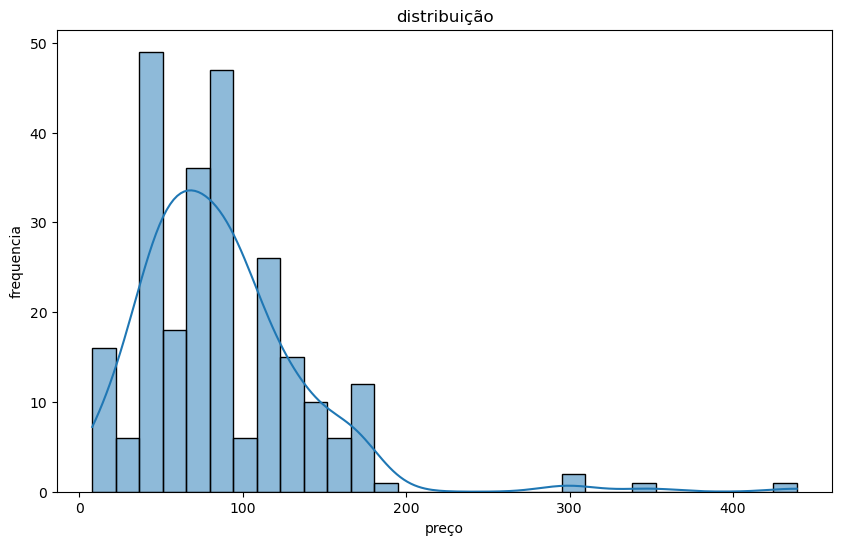

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_zara, x='price', bins=30, kde= True)
plt.title('distribuição')
plt.xlabel('preço')
plt.ylabel('frequencia')
plt.show()

Pergunta 4 (Sem Gráfico):
Quantos produtos são sazonais (Seasonal = Yes) e qual o ticket médio?

Objetivo: Ver impacto de produtos sazonais nas vendas.

In [18]:
print(df_zara['Seasonal'].value_counts())

sazonais = df_zara.groupby('Seasonal', observed= True)['price'].mean()
print(sazonais)

Seasonal
Yes    128
No     124
Name: count, dtype: int64
Seasonal
No     86.422903
Yes    86.087500
Name: price, dtype: float64


Pergunta 5 (Com Gráfico):
Comparação de vendas entre produtos sazonais e não sazonais

Usar barplot para comparar volume de vendas.

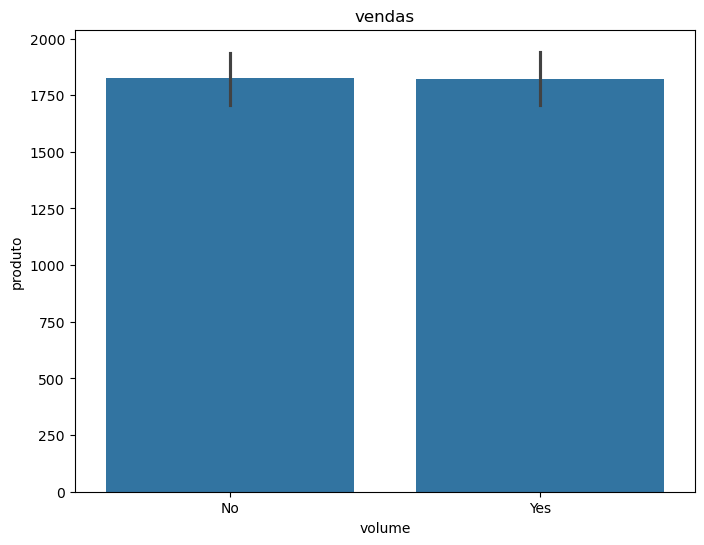

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_zara, x='Seasonal', y='Sales Volume')
plt.title('vendas')
plt.xlabel('volume')
plt.ylabel('produto')
plt.show()

Pergunta 6 (Sem Gráfico):
Qual é o volume total de vendas por categoria de produto?

Saber quais categorias vendem mais.

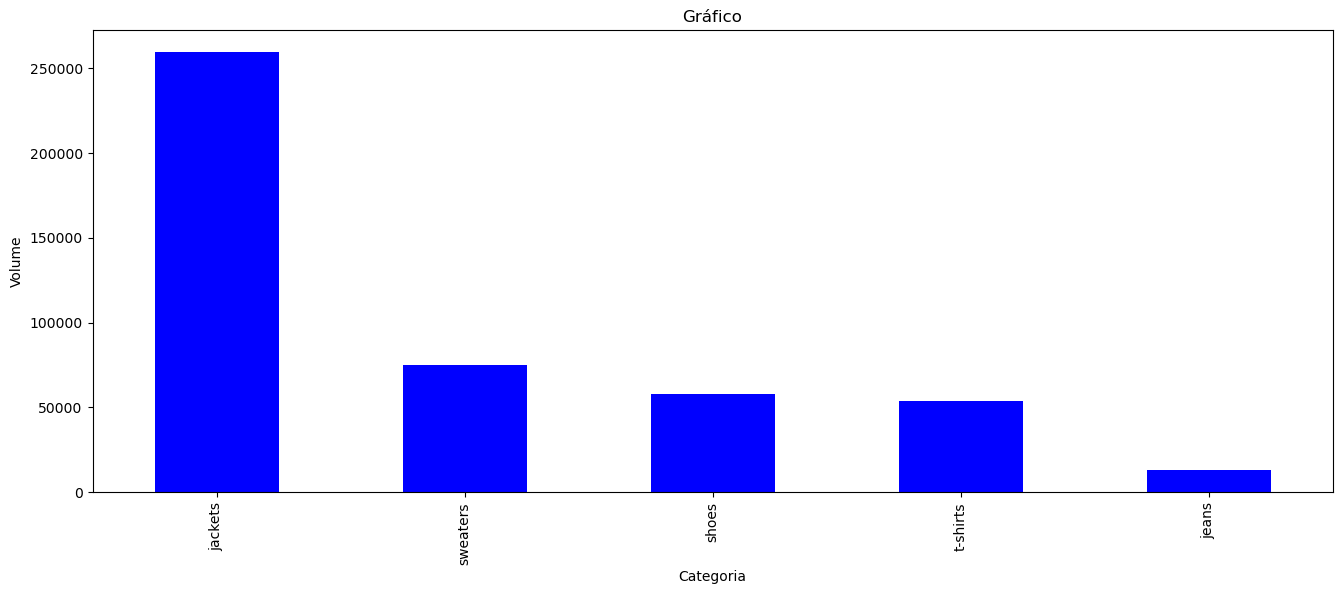

In [20]:
categoria=df_zara.groupby('terms')['Sales Volume'].sum().sort_values(ascending=False)

categoria.plot(kind='bar', figsize=(16,6), color='blue')
plt.title('Gráfico')
plt.xlabel('Categoria')
plt.ylabel('Volume')
plt.show()

 Pergunta 7 (Sem Gráfico)
Qual o ticket médio por seção da loja (section) e qual delas tem o maior valor?

Aqui analisamos a rentabilidade por setor da Zara (MAN, WOMAN, KIDS, etc).

In [21]:
ticket= df_zara.groupby('section')['average ticket price'].mean().sort_values(ascending=False)

print(ticket)

section
WOMAN    48.928698
MAN      30.313828
Name: average ticket price, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_4552\3948417501.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket= df_zara.groupby('section')['average ticket price'].mean().sort_values(ascending=False)


Pergunta 8 (Com Gráfico)
Existe diferença de ticket médio entre produtos com e sem promoção? (boxplot)

Avaliar se o desconto realmente altera o valor médio pago por produto.

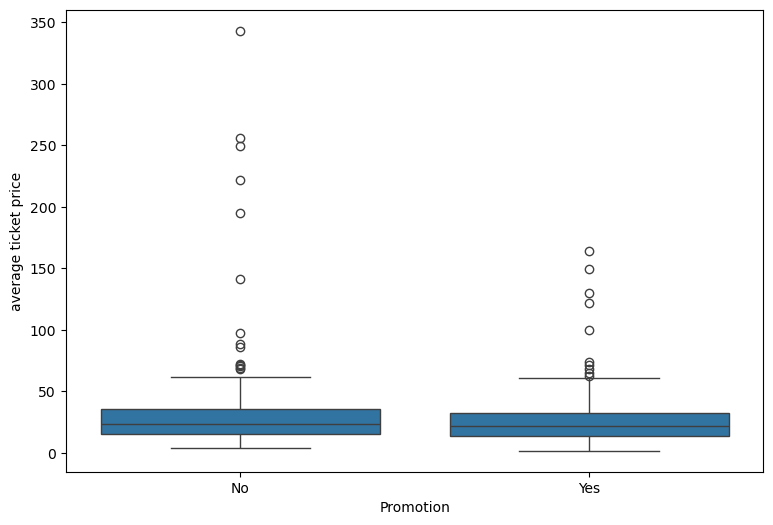

In [22]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df_zara, x='Promotion', y='average ticket price')
plt.show()

Pergunta 9 (Sem Gráfico)
Qual é o produto mais caro que foi vendido (maior preço) e quantas unidades dele foram vendidas?

Análise combinada de máximo com localização de registros.

In [23]:
mais_caro=df_zara.loc[df_zara['price'].idxmax()]

print(mais_caro[['name', 'price', 'Sales Volume']])

name            CROPPED LEATHER JACKET
price                            439.0
Sales Volume                       729
Name: 13, dtype: object


Pergunta 10 (Com Gráfico)
Top 10 produtos com maior volume total de vendas (barplot horizontal)

Boa para destaque visual no projeto (comparação direta entre produtos).

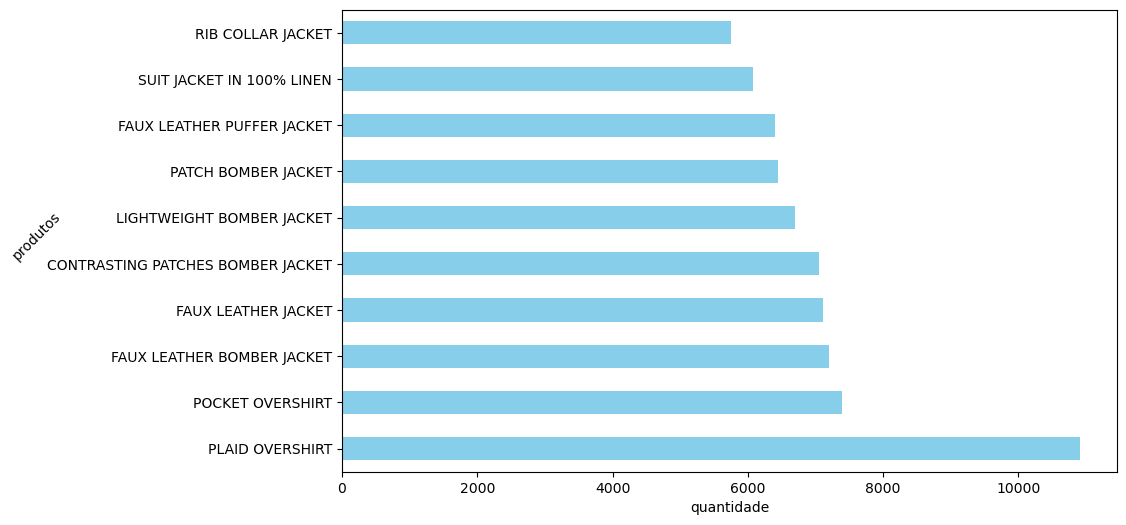

In [25]:
top_10= df_zara.groupby('name')['Sales Volume'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_10.plot(kind='barh', color='skyblue')
plt.xlabel('quantidade')
plt.ylabel('produtos', rotation=45)
plt.show()
